## Star Classifier Predictor

This jupyter notebook was create to explore an test classifier reviews.

#### Install the necessaries packages

### About Dataset

In [1]:
import opendatasets as od
import pandas as pd
import os

For the dataset:

In [4]:
od.download("https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce","../src/data/raw")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


In [5]:
os.remove("../src/data/raw/brazilian-ecommerce/olist_customers_dataset.csv")
os.remove("../src/data/raw/brazilian-ecommerce/olist_geolocation_dataset.csv")
os.remove("../src/data/raw/brazilian-ecommerce/olist_order_items_dataset.csv")
os.remove("../src/data/raw/brazilian-ecommerce/olist_order_payments_dataset.csv")
os.remove("../src/data/raw/brazilian-ecommerce/olist_orders_dataset.csv")
os.remove("../src/data/raw/brazilian-ecommerce/olist_products_dataset.csv")
os.remove("../src/data/raw/brazilian-ecommerce/product_category_name_translation.csv")
os.remove("../src/data/raw/brazilian-ecommerce/olist_sellers_dataset.csv")


The final file is below. Now, just read that with pandas

In [6]:
olist_dataset = pd.read_csv("../src/data/raw/brazilian-ecommerce/olist_order_reviews_dataset.csv")

### Fixing the Dataset

#### Overview

To understand and work with the dataset, first need to understand and explore how it is described. Below, they are be resume some informations about columns of dataset.

In [7]:
olist_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


To use in project, we just need the 3 columns: __review_score__, __review_comment_title__ and __review_comment_message__. 
The dataset contain some blank spaces in somes spaces on this columns. This case can be view in cell below.

In [8]:
olist_dataset.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

#### Organizer the dataset

To use the dataset in the project, I need to prepare the dataset by eliminating the columns that I don’t use for analysis and model creation. Additionally, I will remove duplicate rows and invalid inputs when necessary.

In [9]:
olist_dataset = olist_dataset[['review_score', 'review_comment_title', 'review_comment_message']]
olist_dataset.head(20)

,review_score,review_comment_title,review_comment_message
0,4,NaN,NaN
1,5,NaN,NaN
2,5,NaN,NaN
3,5,NaN,Recebi bem antes do prazo estipulado.
4,5,NaN,Parabéns lojas lannister adorei comprar pela I...
5,1,NaN,NaN
6,5,NaN,NaN
7,5,NaN,NaN
8,5,NaN,NaN
9,4,recomendo,aparelho eficiente. no site a marca do aparelh...


The, removing rows when the two columns ('review_comment_title' and 'review_comment_message') be nulls at the same time.

In [10]:
olist_dataset = olist_dataset.dropna(subset=['review_comment_title', 'review_comment_message'], how='all').reset_index(drop=True)


In [11]:
olist_dataset.head(20)

,review_score,review_comment_title,review_comment_message
0,5,NaN,Recebi bem antes do prazo estipulado.
1,5,NaN,Parabéns lojas lannister adorei comprar pela I...
2,4,recomendo,aparelho eficiente. no site a marca do aparelh...
3,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
4,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes..."
5,2,NaN,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E..."
6,1,Não chegou meu produto,Péssimo
7,5,Ótimo,Loja nota 10
8,5,NaN,obrigado pela atençao amim dispensada
9,5,NaN,A compra foi realizada facilmente.\r\nA entreg...


In [12]:
olist_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42706 entries, 0 to 42705
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_score            42706 non-null  int64 
 1   review_comment_title    11568 non-null  object
 2   review_comment_message  40977 non-null  object
dtypes: int64(1), object(2)
memory usage: 1001.1+ KB


In [13]:
# Define invalids entries on dataset
invalid_placeholders = ["NULL", "N/A", "NONE", "???"]

# Mask for review_comment_title
cond_title = (
    olist_dataset['review_comment_title'].isna() | 
    (olist_dataset['review_comment_title'].str.strip() == '') |
    (olist_dataset['review_comment_title'].str.strip().isin(invalid_placeholders))
)

# Mask for review_comment_message
cond_message = (
    olist_dataset['review_comment_message'].isna() | 
    (olist_dataset['review_comment_message'].str.strip() == '') |
    (olist_dataset['review_comment_message'].str.strip().isin(invalid_placeholders))
)

# Combine masks with & to remove rows with the two masks at the same time
invalid_mask = cond_title & cond_message

# Filter invalids rows
invalid_rows = olist_dataset[invalid_mask]

In [14]:
print(f"There are {len(invalid_rows)} on the dataset")
invalid_rows.head(21)


There are 20 on the dataset


,review_score,review_comment_title,review_comment_message
4362,5,NaN,\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n
5125,5,NaN,\r\n\r\n
5165,5,NaN,\r\n
11355,5,NaN,\r\n
11759,4,NaN,
15887,4,NaN,
17079,5,NaN,\r\n
17710,5,NaN,
19487,5,NaN,
20984,1,NaN,???


In [15]:
olist_dataset_reviews = olist_dataset[~invalid_mask].reset_index(drop=True)


The final dataset (__olist_dataset_reviews__) contains 3 columns with data that I can use for analysis. The rows contain reviews in the form of star ratings and include at least one data column. This specification will be used to build the model with as much data as possible.

### Exporing the dataset

Exploring the dataset about star reviews numbers.

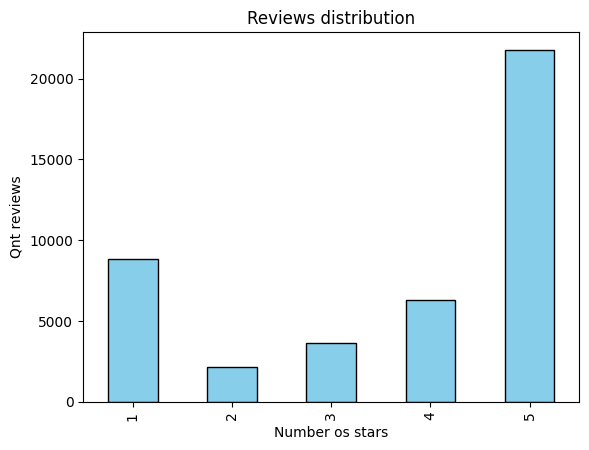

In [16]:
import matplotlib.pyplot as plt

olist_dataset_reviews['review_score'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Number os stars')
plt.ylabel('Qnt reviews')
plt.title('Reviews distribution')
plt.show()


The figure shows how unbalanced the dataset is in terms of the distribution of available reviews. The number of 5-star reviews is higher than the number of other star ratings. The number of 1-star reviews, in second place, shows how people generally review the dataset, mostly in two ways: when they like the product/service or when they have a bad experience.

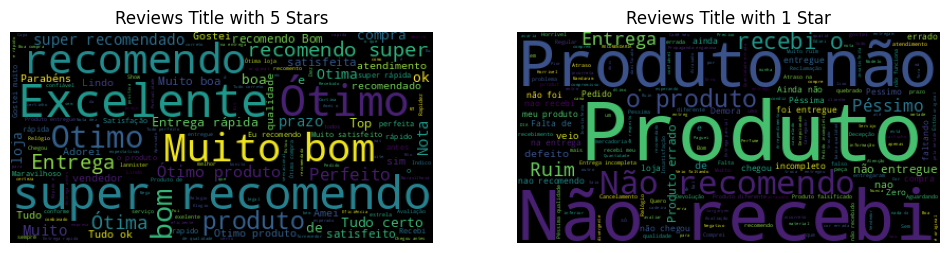

In [17]:
from wordcloud import WordCloud

positive_title = " ".join(olist_dataset_reviews[olist_dataset_reviews['review_score'] == 5]['review_comment_title'].fillna(""))
negative_title = " ".join(olist_dataset_reviews[olist_dataset_reviews['review_score'] == 1]['review_comment_title'].fillna(""))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(WordCloud(background_color='black').generate(positive_title))
ax[0].set_title("Reviews Title with 5 Stars")
ax[0].axis('off')

ax[1].imshow(WordCloud(background_color='black').generate(negative_title))
ax[1].set_title("Reviews Title with 1 Star")
ax[1].axis('off')

plt.show()


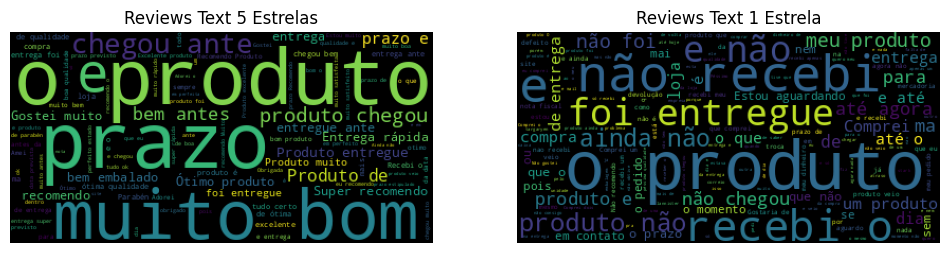

In [18]:
positive_text = " ".join(olist_dataset_reviews[olist_dataset_reviews['review_score'] == 5]['review_comment_message'].fillna(""))
negative_text = " ".join(olist_dataset_reviews[olist_dataset_reviews['review_score'] == 1]['review_comment_message'].fillna(""))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(WordCloud(background_color='black').generate(positive_text))
ax[0].set_title("Reviews Text 5 Estrelas")
ax[0].axis('off')

ax[1].imshow(WordCloud(background_color='black').generate(negative_text))
ax[1].set_title("Reviews Text 1 Estrela")
ax[1].axis('off')

plt.show()

The word distribution varies significantly between different star ratings. There are words that are commonly associated with each type of review, whether it is a 5-star or a 1-star rating. In positive reviews (5 stars), words expressing satisfaction, such as "muito bom" "excelente" and "ótimo" frequently appear. On the other hand, in negative reviews (1 star), words indicating dissatisfaction, such as "não recebi" and "não péssimo" are more frequent.

However, some words appear in both cases but do not necessarily indicate sentiment on their own. A good example is the word "Recomendo" In some 5-star reviews, users say they recommend the product, while in 1-star reviews, they explicitly state that they do not recommend it. Without proper context, these words could lead to misinterpretations in sentiment analysis.

To address this, in my project, I plan to merge the title and review text into a single string. This will help better link words to their meanings by preserving their context, ensuring a more accurate sentiment analysis and text processing.

### Create the function to prepare the strings

In [21]:
import emoji

def remove_emojis(inputString: str) -> str:
    listCaracteres = [char for char in inputString if not emoji.is_emoji(char)] # Analyzer string and remove emojis.
    return "".join(listCaracteres)

In [24]:
sentencesList = [
    "Good morning! ☀️😊",
    "Let's go! 🚀🔥",
    "This is amazing! 😍✨",
    "I'm hungry! 🍕😋",
    "Coffee time ☕😁",
    "Congratulations! 🎉🎂",
    "The rain is heavy ☔🌧️",
    "Good night! 🌙💤",
    "See you later! 👋😊",
    "That was funny! 😂🤣"
]

for sentence in sentencesList:
    print(f"The sentence: \"{sentence}\" now is \"{remove_emojis(sentence)}\"")

The sentence: "Good morning! ☀️😊" now is "Good morning! ️"
The sentence: "Let's go! 🚀🔥" now is "Let's go! "
The sentence: "This is amazing! 😍✨" now is "This is amazing! "
The sentence: "I'm hungry! 🍕😋" now is "I'm hungry! "
The sentence: "Coffee time ☕😁" now is "Coffee time "
The sentence: "Congratulations! 🎉🎂" now is "Congratulations! "
The sentence: "The rain is heavy ☔🌧️" now is "The rain is heavy ️"
The sentence: "Good night! 🌙💤" now is "Good night! "
The sentence: "See you later! 👋😊" now is "See you later! "
The sentence: "That was funny! 😂🤣" now is "That was funny! "


In [ ]:
def remove_simbols(inputString: str) -> str:
    pass

In [ ]:
def remove_spetialsCaracteres(inputString: str) -> str:
    pass